# Table of Contents

1. [Load Packages and Data](#paragraph1)
2. [Raw Data Analysis](#paragraph2)
    1. [EV Survey Data](#subparagraph1)

## Load Packages and Data<a name="paragraph1"></a>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from os import listdir
from os.path import isfile, join

import os 
from pathlib import Path

In [2]:
#collect info about current working directory and the location of the raw data pickle files

wd = Path(os.getcwd())
parent_dir = wd.parent.absolute()


In [3]:
#Data for the EV Vehicle list and attributes
filename = "ev_vehicle_data_raw.pkl"
filepath = f"{wd}\\{filename}"

ev_vehicle_data_raw = pd.read_pickle(filepath)
ev_vehicle_data_raw.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [4]:
#Data for the EV survey
filename = "ev_survey_output_raw.pkl"
filepath = f"{wd}\\{filename}"

ev_survey_output_raw = pd.read_pickle(filepath)
ev_survey_output_raw.head()

,response_id,year_submitted_survey_2,months_owned,year_make_model,electric_range,ev_type,discontinuance,surveyed_age,surveyed_gender,dist_1,...,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type,last_page
0,1.0,2019.0,24.0,2016 BMW i3,81.0,PHEV,Continued,25.0,Male,13.92,...,5.0,5.0,5.0,"$150,000 to $199,999",No Charging,No charging,Level 2,25.0,1.0,40.0
1,2.0,2019.0,20.0,2018 Tesla Model 3 Long Range,310.0,BEV,Original,35.0,Male,10.25,...,5.0,5.0,5.0,NaN,Level 2,DC Fast,No charging,NaN,0.0,37.0
2,3.0,2019.0,23.0,2017 Chevrolet Volt,53.0,PHEV,Original,45.0,Male,NaN,...,2.0,3.0,2.0,"$200,000 to $249,999",No Charging,Level 2,No charging,27.0,1.0,40.0
3,4.0,2019.0,45.0,2016 Tesla Model S,271.0,BEV,Original,45.0,Male,8.68,...,4.0,4.0,4.0,I prefer not to answer,Level 2,No charging,No charging,24.0,0.0,40.0
4,5.0,2019.0,19.0,2019 Nissan Leaf,84.0,BEV,Original,65.0,Male,NaN,...,4.0,5.0,5.0,"$200,000 to $249,999",Level 2,Level 2,No charging,24.0,1.0,40.0


## Raw Data Analysis<a name="paragraph2"></a>
Now that we have loaded the raw data into one place, let's take a look at initial findings.

### EV Survey Data<a name="subparagraph1"></a>

In [7]:
ev_survey_output_raw.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   4833 non-null   float64
 1   year_submitted_survey_2       4833 non-null   float64
 2   months_owned                  4330 non-null   float64
 3   year_make_model               4833 non-null   object 
 4   electric_range                4830 non-null   float64
 5   ev_type                       4673 non-null   object 
 6   discontinuance                4833 non-null   object 
 7   surveyed_age                  4373 non-null   float64
 8   surveyed_gender               4438 non-null   object 
 9   dist_1                        3811 non-null   float64
 10  trips_greater_200             4833 non-null   float64
 11  safety_satisfaction           4146 non-null   float64
 12  comfort_satisfaction          4146 non-null   float64
 13  ref

#### What percentage of null values is present in each column?

response_id                      0.041365
home_charge_type                 0.041365
finance_type                     0.041365
trips_greater_200                0.041365
discontinuance                   0.041365
last_page                        0.041365
year_submitted_survey_2          0.041365
year_make_model                  0.041365
electric_range                   0.103413
ev_type                          3.350569
surveyed_gender                  8.210962
surveyed_age                     9.555326
months_owned                    10.444674
adas_satisfaction               14.250259
charge_access_satisfaction      14.250259
range_satisfaction              14.250259
reliability_satisfaction        14.250259
purch_price_satisfaction        14.250259
performance_satisfaction        14.250259
comfort_satisfaction            14.250259
safety_satisfaction             14.250259
env_impact_satisfaction         14.250259
refuel_recharge_satisfaction    14.250259
household_income                15

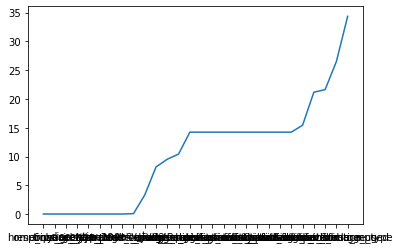

In [18]:
print(100*ev_survey_output_raw.isnull().mean().sort_values(ascending=True))


#plot the missing values for visual reference
a = 100*ev_survey_output_raw.isnull().mean().sort_values(ascending=True)
plt.plot(a)
plt.show()

Observations:

* The satisfaction survey results share an almost identical number of missing entries
* The peak missing value comes from the work_charge_type
* The discontinuance data fortunately contains <1% missing entries.

<AxesSubplot:>

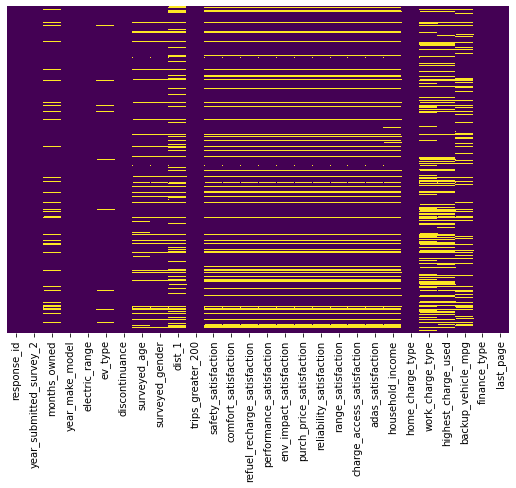

In [19]:
fig_dims = (9, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(ev_survey_output_raw.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

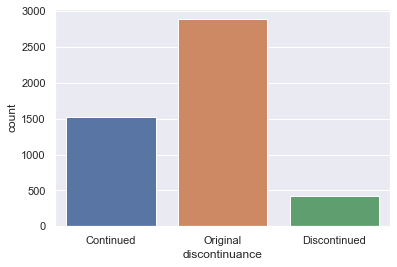

In [32]:
sns.set_theme
ax = sns.countplot(x = ev_survey_output_raw.discontinuance, data = ev_survey_output_raw)
plt.show()

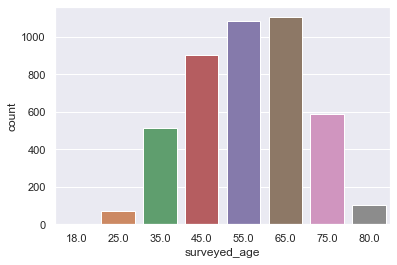

In [39]:
ax = sns.countplot(x = ev_survey_output_raw.surveyed_age, data = ev_survey_output_raw)
plt.show()

C:\Users\mrpal\anaconda3\envs\ml_data_engineering\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='electric_range', ylabel='months_owned'>

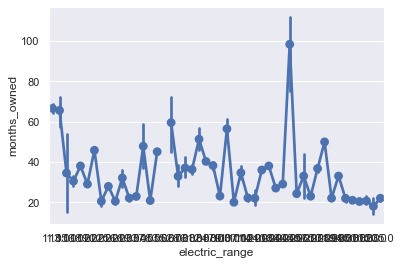

In [45]:
sns.pointplot(ev_survey_output_raw.electric_range, ev_survey_output_raw.months_owned)

### Profile the raw data for the EV survey

In [42]:
profile = ProfileReport(ev_survey_output_raw, title="Pandas Profiling Report")

In [41]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Profile the raw data for the EV vehicles

In [46]:
profile = ProfileReport(ev_vehicle_data_raw, title="Pandas Profiling Report")

In [47]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]